# Importing libraries & data


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from google.colab import files
uploaded = files.upload()

Saving close-forecast.csv to close-forecast.csv


In [0]:
# Baseline data
import io
baselinePanda = pd.read_csv(io.BytesIO(uploaded['close-forecast.csv']))
# Dataset is now stored in a Pandas Dataframe

In [0]:
baselinePanda.head()
baselinePanda.tail()

ds      yhat  yhat_lower  yhat_upper  ...  HIGH  LOW   y  VOL
7225  2020-01-26 23:00:00  1.114497    0.966687    1.256245  ...   NaN  NaN NaN  NaN
7226  2020-01-27 23:00:00  1.115302    0.958323    1.264775  ...   NaN  NaN NaN  NaN
7227  2020-01-28 23:00:00  1.113990    0.949192    1.271984  ...   NaN  NaN NaN  NaN
7228  2020-01-29 23:00:00  1.113522    0.938474    1.282208  ...   NaN  NaN NaN  NaN
7229  2020-01-30 23:00:00  1.114430    0.933381    1.291965  ...   NaN  NaN NaN  NaN

[5 rows x 9 columns]

In [0]:
count = 0
for i in range(len(baselinePanda['y'])):
  if(baselinePanda['y'][i] != 'NaN'):
    count += 1
print(count)

7230


In [0]:
baselinePanda = baselinePanda.dropna(subset=['y'])

In [0]:
absError = np.zeros(len(baselinePanda['y']))
for i in range(len(baselinePanda['y'])):
  absError[i] = abs(baselinePanda['y'][i]-baselinePanda['yhat'][i])
print(absError.mean())
print(absError[len(baselinePanda['y'])-1])

0.0013840744387499848
0.008888045331371108


In [0]:
baselinePanda.tail()

ds      yhat  yhat_lower  ...      LOW        y      VOL
7195  2019-12-31 20:00:00  1.113026    1.110511  ...  1.11960  1.11989  18803.0
7196  2019-12-31 20:00:00  1.113026    1.110511  ...  1.12230  1.12262  27422.0
7197  2019-12-31 21:50:00  1.112864    1.110268  ...  1.11981  1.12030   9098.0
7198  2019-12-31 23:00:00  1.112822    1.110229  ...  1.12010  1.12029   2983.0
7199  2019-12-31 23:00:00  1.112822    1.110229  ...  1.12150  1.12171   6137.0

[5 rows x 9 columns]

In [0]:
test = analyse(baselinePanda['yhat'], baselinePanda['y'], 0.000001)

<Figure size 432x288 with 0 Axes>

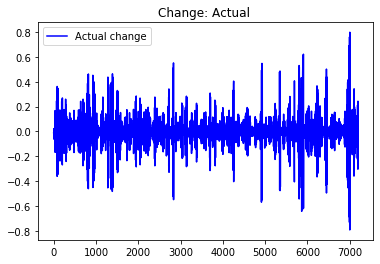

Bar chart for cases

error count:
1676
Case 1:
0.0
Case 2:
2982.0
Case 3:
0.0
Case 4:
0.0
Case 5:
0.0
Case 6:
2397.0
Case 7:
143.0
Case 8:
0.0


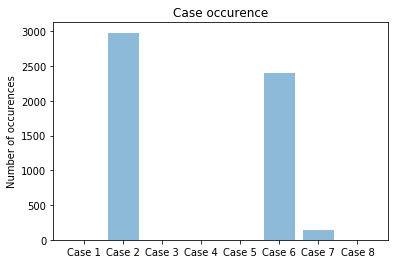

Bar chart for optimality

The number of nonnegative cases is:
2982.0
The number of uncertain but optimal cases is:
0.0
The number of uncertain but non optimal cases is:
0.0
The number of nonpositive cases is:
2540.0


In [0]:
generalPlot(test)

Portfolio Value over time:


Action taken over time:


<Figure size 432x288 with 0 Axes>

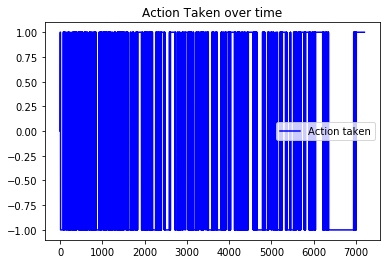

Profitability action taken over time:


<Figure size 432x288 with 0 Axes>

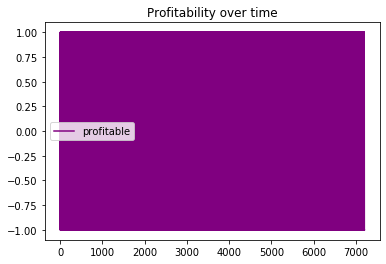

104484.32113854567
104490.10092576452
104495.5
107442.52232817786
107443.48138808494
107665.98328652317
107404.15993189541
107731.19936020333
107709.14098234092
actual rates:
1.12171
1.12029
1.1203
1.1226200000000002
1.11989
1.1233
1.12307
1.123
1.1228799999999999
length predicted rates
7200
length actual rates
7201
mean portfolio value
106170.83200001704
Final Value
104495.5
The profit is:
-11.178861454332946
The profit in percentages is:
-0.010697935752575896


<Figure size 432x288 with 0 Axes>

In [0]:
newActual = appendBeginningValue(baselinePanda['OPEN'][0], baselinePanda['y'])
singleStepTrader(50000, 50000, 0.000001,baselinePanda['yhat'], newActual)

2,81 percent if taken until the last reasonable number and starting at 104500
2,33 percent if taken until the last reasonable number and starting at 105000

In [0]:
# Multi Step
import io
multiStepPanda = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))

In [0]:
baselinePanda['OPEN'][0]

NameError: ignored

# Calling the methods & running tests

In [0]:
# Main method
# Design & run desired test here
# Carefully track the test you run, and download the pictures immediately afterwards. Otherwise they might be updated in the next test section.

In [0]:
# Function to swiftly run a single step general test
def runSingleStepGeneral (predictedRates, actualRates, transactionPercentage):
  toBeAnalyzed = analyse(predictedRates, actualRates, transactionPercentage)
  generalPlot(toBeAnalyzed)

In [0]:
# Function to swiftly run a single step portfolio test
def runSingleStepPortfolio(euro, dollar, transactionCost,predictedRates,actualRates):
  portfolioPerformance = singleStepTrader(euro, dollar, transactionCost,predictedRates,actualRates)
  portfolioPlot(portfolioPerformance)

In [0]:
# Function to swiftly run a multi step general test
def runMultiStep(predictedRates, actualRates, transactionCost,accuracyRate):
  toBeAnalyzed = multistepTrade(predictedRates, actualRates, transactionCost,accuracyRate)
  multiStepPlotting(toBeAnalyzed)

# Single step general (non-portfolio specific) assessment
This section assesses the general succes of the implementation.

In [0]:
# non-trade / portfolio specific method

# this method creates the percentage changes
def analyse(predictedRates, actualRates, transactionPercentage):# transactionPercentage = 0.00001 might be reasonable place to start
  
  #initalize array storing actual percentage exchange rate change, predicted percentage exchange rate change and case number
  percentualized = np.empty((3,len(predictedRates)-1))

  # Quick function to compute change in percentages
  def percentualize(new,old):
    x = ((new-old)/old)*100
    return x

  # Quick function that can determine the sign as can be seen in the report (positive, negative or zero)
  def sign(value):
    if(value > 0): #positive value
      return 1
    elif(value < 0):# negative value
      return -1
    else: # value  = 0
      return 0

  # loop to go over the predicted and actual price, compute their percentual changes and indicate which case is applicable to the change.
  for i in range(len(predictedRates)-2):
    percentualized[0,i] = percentualize(predictedRates[i+1],actualRates[i])  # Predicted % change
    percentualized[1,i] = percentualize(actualRates[i+1],actualRates[i])        # actual % change
    
    predictedChange = percentualized[0,i] # for readability I give the values above simpler names
    actualChange = percentualized[1,i]

    #section deciding which of the cases is applicable
    if((abs(predictedChange) <= abs(actualChange) <= transactionPercentage) and sign(predictedChange) == sign(actualChange)):
      percentualized[2,i] = 1 # case 1
    elif((abs(predictedChange) >= abs(actualChange) >= transactionPercentage) and sign(predictedChange) == sign(actualChange)):
      percentualized[2,i] = 2 # case 2
    elif((abs(predictedChange) >= transactionPercentage >= abs(actualChange)) and sign(predictedChange) == sign(actualChange)):
      percentualized[2,i] = 3 # case 3
    elif((abs(predictedChange) <= transactionPercentage <= abs(actualChange)) and sign(predictedChange) == sign(actualChange)):
      percentualized[2,i] = 4 # case 4
    # for the cases wher the sign is not equal
    elif((abs(predictedChange) <= abs(actualChange) <= transactionPercentage) and sign(predictedChange) != sign(actualChange)):
      percentualized[2,i] = 5 # case 5
    elif((abs(predictedChange) >= abs(actualChange) >= transactionPercentage) and sign(predictedChange) != sign(actualChange)):
      percentualized[2,i] = 6 # case 6
    elif((abs(predictedChange) >= transactionPercentage >= abs(actualChange)) and sign(predictedChange) != sign(actualChange)):
      percentualized[2,i] = 7 # case 7
    elif((abs(predictedChange) <= transactionPercentage <= abs(actualChange)) and sign(predictedChange) != sign(actualChange)):
      percentualized[2,i] = 8 # case 8
    else: # errors
      percentualized[2,i] = 0
  return percentualized

In [0]:
# TO BE DEVELOPED HERE: A PLOTTING METHOD TO VISUALIZE THE OCCURENCE OF THE DIFFERENT CASES OVER THE TESTING PERIOD def generalPlot (percentualized):
# Green: profit nonnegative: case 2
# Yellow: profit uncertain, optimal action is taken : 1,5
# Orange: profit uncertain, optimal action is not taken: 3
# Red: Profit nonpositive : 4,6,7,8

def generalPlot (percentualized):
  plt.figure()

  plt.plot(percentualized[0,:], 'black', label='Predicted change')
  plt.title('Change: predicted ')
  plt.legend()
  plt.show()
  plt.savefig('PredictedChange.png', bbox_inches='tight')
  
  plt.figure()
  plt.plot(percentualized[1,:],'blue', label='Actual change')
  plt.title('Change: Actual ')
  plt.legend()
  plt.show()
  plt.savefig('ActualChange.png', bbox_inches='tight')
  
  integerArray = percentualized[2,:].astype(int)
  print('Bar chart for cases')  
  print() 
  objects = ('Case 1','Case 2','Case 3','Case 4','Case 5','Case 6','Case 7','Case 8', )
  y_pos = np.arange(len(objects))
  caseCount = np.zeros(len(objects))
  errorCount = 0
  for i in range(len(integerArray)-1):
    if(integerArray[i] != 0):
      index = integerArray[i] - 1
      caseCount[index] = caseCount[index] + 1
    else:
      errorCount = errorCount + 1
  print('error count:')
  print(errorCount)
  # objects[0].set_color('yellow')
  # objects[1].set_color('green')
  # objects[2].set_color('orange')
  # objects[3].set_color('red')
  # objects[4].set_color('yellow')
  # objects[5].set_color('red')
  # objects[6].set_color('red')
  # objects[7].set_color('red')

  print('Case 1:')
  print(caseCount[0])
  print('Case 2:')
  print(caseCount[1])
  print('Case 3:')
  print(caseCount[2])
  print('Case 4:')
  print(caseCount[3])
  print('Case 5:')
  print(caseCount[4])
  print('Case 6:')
  print(caseCount[5])
  print('Case 7:')
  print(caseCount[6])
  print('Case 8:')
  print(caseCount[7])

  plt.bar(y_pos, caseCount, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Number of occurences')
  plt.title('Case occurence')
  plt.savefig('CasesBarChart.png', bbox_inches='tight')
  plt.show()

  
  
  # This section plots a bar chart that checks for the 4 cases of profitability 
  print('Bar chart for optimality')  
  print() 
  objects2 = ('Nonnegative', 'Uncertain but optimal','Uncertain, non optimal','nonpositive')
  y_pos2 = np.arange(len(objects2))
  caseCount2 = np.zeros(len(objects2))
  for i in range(len(integerArray)-1):
    if (integerArray[i] == 0):
      next    
    elif (integerArray[i] == 2):
      caseCount2[0] = caseCount2[0]+1
    elif (integerArray[i] == 1 or integerArray[i] == 5):
      caseCount2[1] = caseCount2[1] + 1
    elif (integerArray[i] == 3):
      caseCount2[2] = caseCount2[2] + 1
    else:
      caseCount2[3] = caseCount2[3] + 1

  # objects2[1].set_color('green')
  # objects2[2].set_color('yellow')
  # objects2[3].set_color('orange')
  # objects2[4].set_color('red')
  
  print('The number of nonnegative cases is:')
  print(caseCount2[0])
  print('The number of uncertain but optimal cases is:')
  print(caseCount2[1])
  print('The number of uncertain but non optimal cases is:')
  print(caseCount2[2])
  print('The number of nonpositive cases is:')
  print(caseCount2[3])

  plt.bar(y_pos2, caseCount2, align='center', alpha= 1)
  plt.xticks(y_pos2, objects2)
  plt.ylabel('Number of occurences')
  plt.title('Profitability occurence')
  plt.savefig('4ProfitabilityCases.png', bbox_inches='tight')
  plt.show()

# Portfolio specific trade implementation for single step

In [0]:
# A quick function that appends a value at the start of an array
# It might be useful when wanting to run the next cell, because to determine the initial value of the portfolio in my implementation 
# an exchange rate that is not predicted is required. To this end the length of the actual rates is 1  greater than that of the predicted rate.
# The choice of begining value can be either the last closing price of the training data or the open price of the first timestamp of the testing data
def appendBeginningValue(beginningValue, actualRates):
  returnArray = np.empty(len(actualRates)+1)
  returnArray[0] = beginningValue
  for i in range(1,len(actualRates)+1):
    returnArray[i] = actualRates[i-1]
  return returnArray

In [0]:
# Portfolio specific trading implementation
def singleStepTrader (euro, dollar, transactionCost,predictedRates,actualRates): #I assume length actualRates =  length predictedRates + 1

  def portfolioValue (dollar, euro, actualExchangeRate): # returns portfolio value in dollars
    portfolioValue = dollar + actualExchangeRate*euro
    return portfolioValue 

#currentExchangeRate = actualRates[t], predictedExchangeRate = predictedRates [t+1]
  def determineOptAction(currentExchangeRate, predictedExchangeRate, transactionCost):
    if(currentExchangeRate > predictedExchangeRate - transactionCost): # sell dollar
      return -1
    elif(currentExchangeRate < predictedExchangeRate - transactionCost): # buy dollar
      return 1
    else: # no trade
      return 0

# method that checks whether a profit was made over a time period
  def profitable(newPFValue, pfValue):
    if(newPFValue > pfValue): # profitable
      return 1
    elif(newPFValue < pfValue): # loss incurred 
      return -1
    else: # value remained equal
      return 0

# tradeTracker = array that keeps track of information needed to assess trades
  tradeTracker = np.zeros((3,len(predictedRates)))

# initialization of tradetracker array (starting point)
  tradeTracker[0,0] = portfolioValue(dollar,euro,actualRates[0]) #FIRST ROW TRACKS actual portfolio value
  tradeTracker[1,0] = 0 # optimal action tracker
  tradeTracker[2,0] = 0 # profit / even / loss tracker

  for i in range(len(predictedRates) - 1):
 
    optimal = determineOptAction(predictedRates[i],actualRates[i],transactionCost)
    tradeTracker[1,i+1] = optimal #

    if(dollar != 0 and euro != 0): # We only allow exchanging of the portfolio, no shorts or such.
      if(optimal == -1):  #sell dollar
      
        dollar = dollar - 1000 #selling 1000 dollars
        euro = euro + 1000/actualRates[i] #gaining the equivalent in euros
      
        tradeTracker[0,i+1] = portfolioValue(dollar,euro, actualRates[i+1]) # updating the portfolio value
        tradeTracker[2,i+1] = profitable(tradeTracker[0,i+1], tradeTracker[0,i]) # checking whether the portfolio value has increased

      elif (optimal == 1): # buy dollar
        dollar = dollar + 1000  #purchasing 1000 dollars
        euro = euro - 1000/actualRates[i] # at the euro equivalent cost

        tradeTracker[0,i+1] = portfolioValue(dollar,euro, actualRates[i+1]) # updating the portfolio value
        tradeTracker[2,i+1] = profitable(tradeTracker[0,i+1], tradeTracker[0,i]) # checking whether the portfolio value has increased

      else: # no trade
        tradeTracker[0,i+1] = portfolioValue(dollar,euro, actualRates[i+1]) # updating the portfolio value
        tradeTracker[2,i+1] = profitable(tradeTracker[0,i+1], tradeTracker[0,i]) # update = profitable(newPFValue, pfValue) 

    else: # if one possesses only one currency , we assume one cannot short the other for the time being
      tradeTracker[0,i+1] = portfolioValue(dollar,euro, actualRates[i+1]) # updating portfolio value
      tradeTracker[2,i+1] = profitable(tradeTracker[0,i+1], tradeTracker[0,i]) # tracking profitability
  
  # tracks portfolio value over time
  print('Portfolio Value over time:')
  plt.figure()
  plt.plot(tradeTracker[0,:], 'black', label='Portfolio Value')
  plt.title('Portfolio Value over time:')
  plt.legend()
  plt.show()
  plt.savefig('PortfolioValue.png', bbox_inches='tight')

  # Second plot: action taken over time
  print('Action taken over time:')
  plt.figure()
  plt.plot(tradeTracker[1,:], 'blue', label='Action taken')
  plt.title('Action Taken over time')
  plt.legend()
  plt.show()
  plt.savefig('ActionTaken.png', bbox_inches='tight')

  #Third plot: whether action was profitable
  print('Profitability action taken over time:')
  plt.figure()
  plt.plot(tradeTracker[2,:], 'purple', label='profitable')
  plt.title('Profitability over time')
  plt.legend()
  plt.show()
  plt.savefig('ProfitabilityAction.png', bbox_inches='tight')

  for j in range (len(tradeTracker)-1 , len(tradeTracker)-10, -1):
    print(tradeTracker[0,j])
  print('actual rates:')
  for j in range (len(actualRates)-1 , len(actualRates)-10, -1):
    print(actualRates[j])

  print('length predicted rates')
  print(len(predictedRates))
  print('length actual rates')
  print(len(actualRates))

  print('mean portfolio value')
  print(tradeTracker[0,:].mean())
  print('Final Value')
  print(tradeTracker[0,0])
  # calculate profit in dollars
  print('The profit is:')
  print((tradeTracker[0,len(tradeTracker)-1] - tradeTracker[0,0]))
  # calculate profit in percentage
  print('The profit in percentages is:')
  print(((tradeTracker[0,len(tradeTracker)-1] -tradeTracker[0,0])/tradeTracker[0,0])*100)

The following cell contains the plotting method for the portfolio trade implementation. It plots several graphs and returns profit in real terms and as a percentage.

In [0]:
# A PLOTTING METHOD TO VISUALIZE THE results of THE specific TRADER method
def portfolioPlot(tradeTracker):
  portfolioValues = np.empty(len(tradeTracker[0,:]))
  actionTaken = np.empty(len(tradeTracker[0,:]))
  actionProfitable = np.empty(len(tradeTracker[0,:]))

  for i in range (len(tradeTracker[0,:])-1):
    portfolioValues[i] = tradeTracker[0,i]
    actionTaken[i] = tradeTracker[1,i]
    actionProfitable[i] = tradeTracker[2,i]
  
  # tracks portfolio value over time
  print('Portfolio Value over time:')
  plt.figure()
  plt.plot(tradeTracker[0,:], 'black', label='Portfolio Value')
  plt.title('Portfolio Value over time:')
  plt.legend()
  plt.show()
  plt.savefig('PortfolioValue.png', bbox_inches='tight')

  # Second plot: action taken over time
  print('Action taken over time:')
  plt.figure()
  plt.plot(tradeTracker[1,:], 'blue', label='Action taken')
  plt.title('Action Taken over time')
  plt.legend()
  plt.show()
  plt.savefig('ActionTaken.png', bbox_inches='tight')

  #Third plot: whether action was profitable
  print('Profitability action taken over time:')
  plt.figure()
  plt.plot(tradeTracker[2,:], 'purple', label='profitable')
  plt.title('Profitability over time')
  plt.legend()
  plt.show()
  plt.savefig('ProfitabilityAction.png', bbox_inches='tight')

  # calculate profit in dollars
  print('The profit is:')
  print((tradeTracker[0,len(tradeTracker)-1] -tradeTracker[0,0]))
  # calculate profit in percentage
  print('The profit in percentages is:')
  print(((tradeTracker[0,len(tradeTracker)-1] -tradeTracker[0,0])/tradeTracker[0,0])*100)

# General analysis of multi step prediction

In [0]:
# Attempt at sequential trading assessment simulation for multiple time steps
def multistepTrade(predictedRates, actualRates, transactionCost,accuracyRate):
  # Assume output neural net =  2d array with number of rows = number of steps ahead and number of columns = length actualRates or vice versa
  
  # function comparing the expected future rates at one point in time with the actual times
  def singlePhase(timeHorizonPredictions, timeHorizonActual, transactionCost,accuracyRate):
    rateTracker = np.zeros((7,1))
    
    # Function to return the index of a maximum value in an array
    def maxIndex (rates):
      index = 0
      for i in range(len(rates)-1):
        if(rates[i] > rates[index]):
          index = i
      return index

    # Function to return the index of a minimum value in an array
    def minIndex (rates):
      index = 0
      for i in range(len(rates)-1):
        if(rates[i] < rates[index]):
          index = i
      return index

    # Variable initialization
    indexMaximumPredictions = maxIndex(timeHorizonPredictions)
    indexMaximumActual = maxIndex(timeHorizonActual)
    indexMinimumPredictions = minIndex(timeHorizonPredictions)
    indexMinimumActual= minIndex(timeHorizonPredictions)

    # predicted maximum at same time as actual maximum
    if( indexMaximumPredictions == indexMaximumActual):
      rateTracker[0] = 1
    else:
      rateTracker[0] = 0
    # PredictedMinimum at same time as actual minimum
    if( indexMinimumPredictions == indexMinimumActual):
      rateTracker[1] = 1
    else:
      rateTracker[1] = 0
    # optimal action based on predictions is profitable in the first place
    if( timeHorizonPredictions[indexMaximumPredictions] - timeHorizonPredictions[indexMinimumPredictions] >= transactionCost):
      rateTracker[2] = 1
    else:
      rateTracker[2] = 0
    # Actual optimal action is profitable
    if( timeHorizonActual[indexMaximumActual] - timeHorizonActual[indexMinimumActual] >= transactionCost):
      rateTracker[3] = 1
    else:
      rateTracker[3] = 0

    # counting the predictions with acceptable accuracy
    count = 0
    for i in range(len(timeHorizonPredictions)-1):
      if((1-accuracyRate)*timeHorizonActual[i] <=timeHorizonPredictions <=(1+accuracyRate)*timeHorizonActual[i] ): # prediction was within range of actual rate
        count += 1
      else:
        next
    rateTracker[4] = count

    # predictedOptimal strategy is profitable in actual case
    if( timeHorizonActual[indexMaximumPredictions] - timeHorizonActual[indexMinimumPredictions] >= transactionCost):
      rateTracker[5] = 1
    else:
      rateTracker[5] = 0
    
    #local optimality of strategy
    count2 = 0
    for i in range (2):
      count2 += rateTracker[i]
    if (count2 == 3):
      rateTracker[6] = 1
    else:
      rateTracker[6] = 0

    return rateTracker
    # end of single phase method

  numberOfRows  = len(predictedRates[:,1])
  numberOfColumns = len(predictedRates[1,:])

  # Quick function to return the smaller of two values
  def lesser(rows,columns):
    if(rows < columns):
      return rows
    else:
      return columns
  
  # Quick funtion to return the greater of two values
  def greater(rows,columns):
    if(rows > columns):
      return rows
    else:
      return columns

  # initial array to which the single phase instances are to be appended
  multiTracker = np.zeros((7,1))
    
    # determining the length of the predictions (number of timesteps for which X predictions ahead have been made) by selecting the greater value of the 
    # number of columns and the number of rows, assuming that the number of timesteps is larger than the number of predictions ahead
  lengthPredictions = greater(numberOfRows,numberOfColumns)

    # range of i is smallest array, predicted or actual, meaning for which one has the fewest time steps.
  for i in range (lesser(lengthPredictions, len(actualRates))-1):
    while(i + lesser(numberOfRows,numberOfColumns) < len(actualRates)): # making sure that there is no index out of bounds in the actual time array
      if(numberOfRows >= numberOfColumns): # Check to see which is the number of predictions ahead and which is total number of time points for which predictions are made.
        timeHorizonPredictions = predictedRates[i,:]  # all the values in a row
      else:
        timeHorizonPredictions = predictedRates[:,i] # all the values in a column
      
      # moving the window of actual rates along 1 step at the time 
      for j in range (i,i + lesser(numberOfRows,numberOfColumns)):
        timeHorizonActual[j] = actualRates[j]
      
      current = singlePhase(timeHorizonPredictions,timeHorizonActual,transactionCost, accuracyRate) # analysis of single time step
      np.append(multiTracker,current, axis = 1) # add the results of the single time step analysis to the array storing all the steps
      multiTracker = np.delete(multiTracker, 0, 1) # deleting the initialising row of zero's
  
  return multiTracker # returns an analysis of the multi step case

The next cell contains the plotting section for the multi step general analysis. It returns a plot, but most importantly the mean, median and mode of the number of predictions that was within the accuracy rate, the number and rate of profitable trades, and the number and rate of locally optimal predictions

In [0]:
def multiStepPlotting(multiTracker):
  # Analysis of accuracy
  print('--- multi step analysis ---')
  meanNumberOfAcceptablePredictions = multiTracker[4,:].mean()
  medianNumberOfAcceptblePredictions = multiTracker[4,:].median()
  modeOfAcceptablePredictions = multiTracker[4,:].mode()

  print('The mean, median and mode of the number of acceptable predictions are:')
  print(meanNumberOfAcceptablePredictions)
  print(medianNumberOfAcceptblePredictions)
  print(modeOfAcceptablePredictions)
  print()

  
  # Checking profitability of trade based on only prediction
  print('The number and rate of profitable trades is:')
  numberOfProfitableTrades =  multiTracker[5,:].sum()
  rateOfProfitableTrades = (numberOfProfitableTrades/len(multiTracker[5,:]))

  print(numberOfProfitableTrades)
  print(rateOfProfitableTrades)
  print()

  # Checking the amount of times the prediction achieved the actual locally optimal strategy
  print('The number and rate of locally optimal is:')
  numberOfLocalOptima = multiTracker[6,:].sum()
  rateOfLocalOptima = (numberOfLocalOptima/len(multiTracker[6,:]))

  print(numberOfLocalOptima)
  print(rateOfLocalOptima)
  print()

  print('A plot showing the changing of the boolean values over time:')
  plt.figure()
  plt.plot(multiTracker[0,:], 'black', label='boolean correct high point')
  plt.plot(multiTracker[1,:], 'blue', label='boolean correct low point')
  plt.plot(multiTracker[2,:], 'red', label='boolean prediction theoretically profitable')
  plt.plot(multiTracker[3,:], 'Green', label='boolean actual optimal profitable')
  plt.title()
  plt.legend()
  plt.show()
  plt.savefig('multiStepBooleans.png', bbox_inches='tight')